In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#data = work.updated_world_indices(category = 'All', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  26<sup>th</sup> December, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [17]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
    rawdata = rawdata.drop(['China A50', 'SmallCap 2000', 'BSE Sensex', 'Euro Stoxx 50', 'Nasdaq 100', 'KOSDAQ', 'RTSI', 'DJ Shanghai', 'SZSE Component'], axis=0)
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return"))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [4]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

**HIGHLIGHTS**:

- **Wall Street** finished slightly higher during a shortened session on Thursday as investors welcomed news that the UK and the EU finally reached a historic post-Brexit trade deal. Meanwhile, the GOP blocked an attempt from House Democrats to pass USD 2,000 checks to Americans rather than USD 600 initially agreed. The USD 2,000 direct payment proposal was in line with President Trump demands after he threatened to block the new coronavirus aid-bill because of this difference and it is still unclear whether the President will approve the new spending bill. On the corporate front, shares of Alibaba sank near 13% amid news that the Chinese government is conducting an anti-monopoly probe. The Dow Jones gained 70 points or 0.2% to 30200, finishing the week nearly flat. The S&P 500 added 13 points or .4% to 3703, losing 0.2% on the week. The Nasdaq finished 34 points or 0.3% higher at 12805, booking a 0.4% gain during a shortened week. On Wednesday, a batch of fresh economic data painted a mixed picture: initial claims decreased to 803K compared with expectations of 885K and durable goods orders beat forecasts although both personal income and spending fell more than anticipated.


- **US COVID Update**: Over one million people in the US have received a coronavirus vaccine since the first shot was administered earlier this month, the Centers for Disease Control and Prevention said on Wednesday. Still, the government is battling to contain a wave of coronavirus infections and dramatic a rise in cases is expected after the Christmas and New Year's holidays. As of Wednesday, the United States reported more than 230,000 new infections, out of a total of 18.4 million.



- The CAC 40 (**FRANCE**) ended around the flatline at 5522 on Thursday, in line with its European peers although the trading session was shorter due to Christmas. Investors await the EU and the UK to announce a post-Brexit trade deal after an agreement has been reached on fair competition and fishing rights. However, news showed there was a last-minute disagreement over how much fish EU can catch in the UK. Meanwhile, the French High Authority for Health (HAS) authorized the use of Pfizer/BioNTech COVID-19 vaccine and vaccination will start on Sunday in France. On the data front, industrial producer prices for the home market in France jumped 1.7% from the previous month in November of 2020, following a flat reading in October. France's public debt reached 116.4% of GDP by the end of the 3Q 2020, the country's national statistic agency INSEE announced on Tuesday. On Friday, [French health authorities identified the first case of a person infected with the Covid-19 variant](https://www.bloomberg.com/news/articles/2020-12-25/nyc-hospitalizations-rise-pope-makes-vaccine-plea-virus-update?srnd=premium-asia) circulating in southeast England that prompted France to restrict travel between the two countries.



- The IBEX 35 (**SPAIN**) rose for the third session on Thursday, with the benchmark IBEX 35 finishing above the 8,100 level driven by gains in the energy and technology sectors. The economically-sensitive sectors of the market got a lift from positive news about an imminent Brexit deal. Boris Johnson is due to announce the agreement on Christmas Eve after progress made overnight on fair competition and fishing rights. Among the largest percentage gainers on the index were IAG and Banco Sabadell, up 3.4% and 2.6%, respectively. Producer prices in Spain fell 2.8% year-on-year in November of 2020, following a 4.1% drop in October. Spain's quarterly economic growth was revised lower to 16.4% in the third quarter of 2020, from a preliminary estimate of 16.7%. YoY the GDP shrank 9.0%, compared to a record 21.6% contraction in the previous period.



- The Shanghai Composite (**CHINA**) The Shanghai Composite Index climbed 33 points or 1% to close at 3,397 on Friday, as investors were upbeat following a post-Brexit trade deal between the UK and the EU. Risk sentiment was also boosted by the People's Bank of China's pledge today that it will step up its regulation of the bond market in line with the law. Meanwhile, Reuters reported that China's treasury bond issuance in 2021 will hold steady to this year's if no special-anti-virus bonds are sold. Beijing has issued roughly CNY 7 trillion worth of treasury bonds this year, including CNY 1 trillion of anti-virus bonds. On the pandemic front, China will suspend flights to and from the UK indefinitely over fears of a new strain of a virus. For the week, the index was up less than 0.1%.



- The Nikkei 225 (**JAPAN**) dropped 0.1% to end at 26,657 on Friday, ending the week 0.4% lower. On the data front, official figure showed Japan's jobless rate fell to the lowest in four months in November, while retail sales rose by 0.7% YoY in November, slowing from a 6.4% gain a month earlier and missing market estimates of a 1.7% increase. Meantime, housing starts fell the least in 17 months (-3.7% YoY vs -4.9% YoY consensus). Meantime, former Prime Minister Shinzo Abe will face questioning in Parliament today to correct statements he had made related to a political funding scandal, according to Reuters. Shares of SoftBank Group sank 3.2% after China had started an anti-monopoly probe into Alibaba Group. SoftBank Group is a shareholder in the Chinese e-commerce giant. Toshiba Corp fell 1.3% as US hedge fund Farallon Capital asked it to hold an extraordinary shareholders meeting over the firm's investment strategy.


- The KOSPI (**SOUTH KOREA**) added 1.52% to 2801.85 on Thursday, extending gains of 0.93% in the previous session, trading at fresh record highs and on track to post its eighth straight weekly gain (+1.25%) following news that the South Korean government will buy vaccines for 10 million people from Pfizer and 6 million from Janssen. Locally, Finance Minister Hong Nam-ki said Wednesday that the South Korean government is poised to launch the first batch of its 20 trillion-won (USD 18 billion) government policy fund aimed at supporting Korean New Deal projects by March. Meanwhile, health authorities were considering whether to raise the country's social distancing guidelines to Level 3, the highest in its five-tier scheme. In local data, producer prices were unchanged in November as a rise in prices of livestock and fishery goods was offset by falling prices of farm goods.


- The S&P/ASX 200 (**AUSTRALIA**) gained 0.33% to 6664.80 on Thursday, following an advance of 0.66% in the previous session while losing 1.36% for the week and closing early ahead of the Christmas holiday. During thr week, preliminary data showed that retail sales in Australia unexpectedly jumped by 7% month-over-month in November, posting the fastest growth in retail trade since May.  Private sector credit rose by 0.1% month-over-month in November after a flat reading in the previous three months, while preliminary data revealed a trade surplus of USD 1,958m for the same period, with exports lifting 1% and imports gaining 11%. Australian authorities [extended a lockdown for Sydney’s Northern Beaches until at least Dec. 30](https://www.bloomberg.com/news/articles/2020-12-26/lockdown-extended-for-sydney-s-northern-beaches-as-cluster-grows?srnd=premium-asia) and urged the rest of the city to avoid crowds as a cluster of Covid-19 infections continues to grow. The ASX 200 will be closed on December 25th and 28th for Christmas. 

**EMERGING MARKETS**

- **MEXICO’s IPC** jumped 2.3% to 43,597, as the arrival of the first doses of the Pfizer vaccine to Mexico and better-than-expected macro data buoyed sentiment. On the week, the index lost 1.14%. On the domestic side, economic activity surged 1.6% on a monthly basis in October and beat consensus of a 1.2% advance, while the annual print was -5.3% and also was better than expectations of -5.4%. Meanwhile, mid-month inflation fell to 3.22% in December from 3.43% in the previous period, increasing monetary space for further easing. The unemployment rate dropped to 4.4% in November from 4.7% in the previous month and below market expectations of 4.5%. On the trade front, the country recorded a USD 3.03 billion trade surplus in November, 4 times higher than a USD 767 million surplus a year earlier as exports increased 2.3% to USD 38.32 billion, due to a 3.3% gain in non-oil sales, mainly to the US (3.2%) while oil sales sank 17.1%.  The Ministry of Finance improved its 2021 debt-to-GDP forecasts to 52.6% from 53.7%, as the economy and receipts continue to recover. 



- **BRAZIL**’s Ibovespa gained 1% to 117,807 on Wednesday and closed higher for the second session, while losing 0.18% this week. he Ibovespa was closed on December 24th and 25th for Christmas. On the domestic side, the Ministry of Health’s Surveillance Secretary said on Tuesday that the country should receive 150 million doses of Covid-19 vaccines in the first half of 2021 from Pfizer/BioNTech, Sinovac/Butantan and AstraZeneca. On the data front,the economy added a net record high 414,556 jobs in November of 2020, the fifth consecutive month of job gains. Meanwhile, bank lending in Brazil rose 2% over a month earlier to BRL 3,954 million in November, accelerating from an upwardly revised 1.5% gain in the previous month. Lending to companies climbed 2% to BRL 1,751 million (vs 1.2% in October); and lending to households advanced 2% to BRL 2,204 million (vs 1.7%). Year-on-year, bank loans jumped 15.6%, after rising an upwardly revised 14.5% in October.


In other EM developments,


- **Indonesia** is expecting a deeper economic contraction this year of 1.7% to 2.2% from its earlier estimate of a 0.6% to 1.7% slump. The **Philippines** will start talks with Moderna Inc. on or before Dec. 30 to secure the company’s coronavirus vaccine, Foreign Affairs Secretary Teodoro Locsin said Philippine central bank Governor Benjamin Diokno said the monetary easing cycle isn’t over and that he wants to keep interest rates low through the end of 2022. Bank of **Thailand** kept its benchmark interest rate unchanged, while reiterating concerns about a currency rally and lowering its economic growth forecast for next year. Thailand’s cabinet has approved to maintain the country’s inflation target for next year in a range of 1%-3%. **Taiwan** reported its first locally transmitted case of Covid-19 in eight months, ending what was the world’s longest stretch without a domestic infection.


- The **Russian** ruble fell the most in nine months as oil tumbled on concern the pandemic is worsening and a report suggested the U.S. may impose sanctions on the country in response to cyber attacks. **Turkey** temporarily halted flights from the U.K., Denmark, the Netherlands and South Africa amid concern over the new coronavirus strain. **Israel**’s brittle governing coalition collapsed after just seven months, sending the election-fatigued country to its fourth vote in two years. The **United Arab Emirates** has approved the coronavirus shot developed by Pfizer Inc. and BioNTech SE, and Dubai unveiled plans to start a free vaccination campaign. Without disclosing numbers for the efficacy rate of Sinovac’s Covid-19 vaccine in a trial in **Brazil**, results are enough for the company to file for permission for emergency use in the country, an official said. **Chile** will begin its vaccination process this week, President Sebastian Pinera said.

[Back to Table of Contents](#content)

<a id ="fi"></a>
## FIXED INCOME

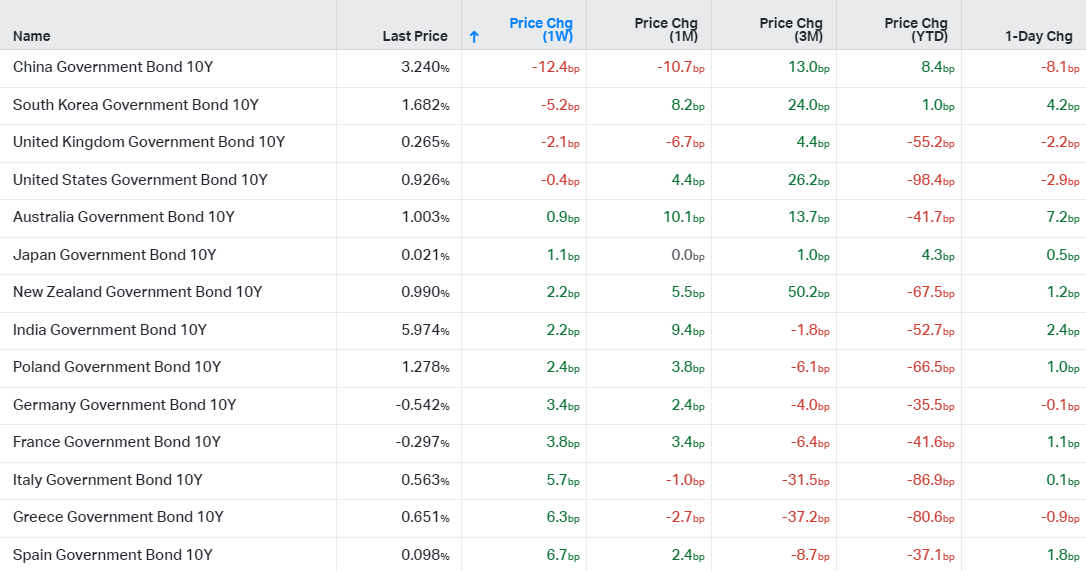

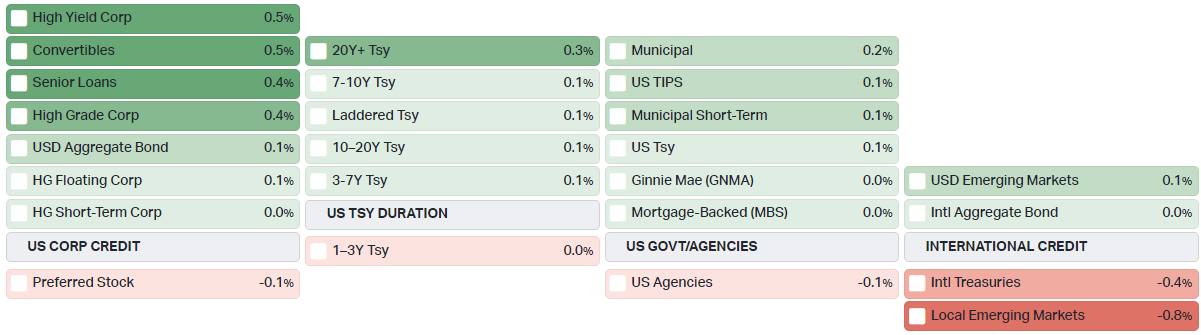

**HIGHLIGHTS**


- U.S. Treasury yields dropped in light trading on Thursday even as Britain clinched a deal to leave the European Union, as investors squared positions for year-end. For the week, US 10Y yields ended marginally lower by 0.4bps to 0.926%. Ten-year yields jumped and a key part of the yield curve hit its steepest level in more than three years on Wednesday as Britain appeared close to a trade deal to avert a turbulent rupture on New Year's Day, almost a year after it formally exited the bloc. Bonds showed less reaction on Thursday after a deal was reached, with prices having already priced in the news. Breakeven rates on 10-year TIPS, which measure expected annual inflation for the next decade, were last at 1.97%, after rising to 1.98% on Wednesday, the highest since at least early 2019.



- China's 10Y bonds rallied the most i.e. 12.4bps this week, followed by South Korea's 5.2bps rally. Most of the other nations saw yields rise this week, with peripheral european nations like Greece, Italy and Spain seeing yields surge by 6-8bps. Over the past month, however, Australian government bonds have taken the most beating with the 10Y yields rising 10bps, while China was the best performer with yields dipping 10.7bps over the last month. Only Japan and China have seen yields surge higher compared to the start of the year by 4.3bps and 8.4bps respectively.


- In EMs, Mexico’s consumer prices rose more than economists’ forecast, supporting the central bank’s decision last week to wait before deciding to resume cutting interest rates. Philippine central bank Governor Benjamin Diokno said the monetary easing cycle isn’t over and that he wants to keep interest rates low through the end of 2022. Poland’s two-year zloty bond yields jumped to a four-month high with local banks offloading the securities to boost liquidity amid withdrawals from corporate deposits, fund managers said. Poland’s central bank may have lent a helping hand to the government when it unexpectedly intervened to weaken the zloty last week.


**CENTRAL BANKS ACTION**


- The central bank of Turkey raised its benchmark one-week repo rate by 200bps to 17% on December 24th 2020, the highest since August of 2019, and above market forecasts of a 150bps hike. Policymakers said that uncertainties surrounding the global economic activity prevail due to a recent increase in Covid-19 cases, despite vaccine rollout. Moreover, restrictions introduced create uncertainties on the short-run outlook, particularly in the services sector. It is the second consecutive rate hike under the new central bank governor as he pledged to tighten policy to ensure price stability. In November, the central bank increased rates by 475bps.


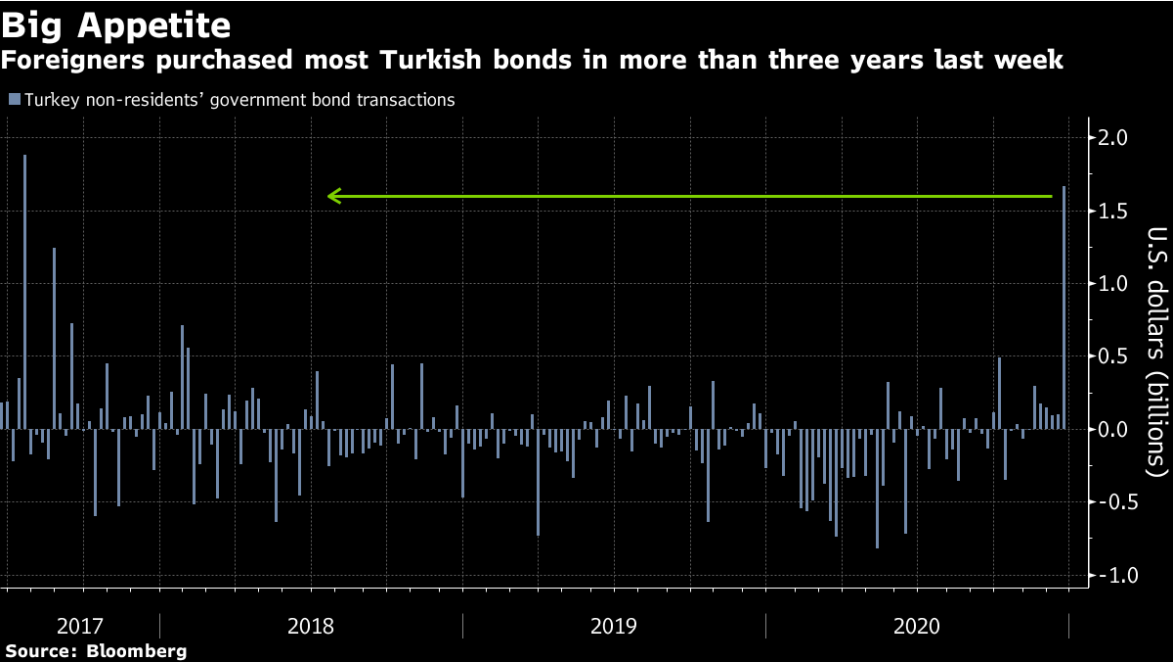



- Overseas investors bought the most Turkish government bonds since July 2017 last week, adding to recent purchases after the country took a U-turn toward market-friendly policies. While economists are looking for more signs that the central bank’s orthodox stance is here to stay, for now it’s taking the right steps, boosting the allure of Turkish assets, according to Henrik Gullberg, a macro economist at Coex Partners

- The Bank of Thailand left its key policy rate steady at a record low of 0.5% for the 5th straight meeting on December 23rd 2020, as widely expected. Policymakers said the decision aims to preserve the limited policy space and support the economic recovery. The central bank added that the Thai economy continued to recover but downside risks and uncertainties remained high and the economy would thus need support from the continued low policy rate. The central bank also lowered its 2021 growth forecasts to 3.2% from an earlier 3.6%. In contrast, it sees a 6.6% drop in 2020, less than an earlier 7.8% decline.



- The People's Bank of China (PBoC) left its benchmark interest rates for corporate and household loans steady for the eighth straight month at its December fixing, in line with market consensus, as the economy continues to recover from the downturn caused by the COVID-19 pandemic. The one-year loan prime rate (LPR) was left unchanged at 3.85%, while the five-year remained at 4.65%. The decision came after the central bank made its largest-ever injection of medium-term funds last week to shore up liquidity. For the year, the one-year LPR was down a total of 30 bps of rate cuts, and the five-year rate was slashed by 15 bps of two cuts. Xinhua news agency reported that China will maintain policy support for its economic recovery, avoiding a sudden shift in policy, to help keep economic growth within a reasonable range in 2021.


- The central bank of Egypt left its key overnight deposit rate unchanged at 8.25% on December 24th 2020, in line with expectations. The overnight lending rate was also left at 9.25%, and the discount rate at 8.75%. Policymakers lowered its inflation target for 2022 to 7% (±2%age points) from 9% (±3%age points). Egypt’s GDP growth is expected to recover albeit gradually, with structural measures expected to support economic activity.


- The central bank of Colombia left its key interest rate steady at a record low of 1.75% on December 18th of 2020, as widely expected. The decision was backed by five of the seven board members. Policymakers noted that the annual inflation fell to 1.49% in November, the lowest since November of 1955. The Committee forecasts inflation to remain at low levels during the first quarter of 2021 and then to accelerate during the rest of the year. Also, the central bank projects the annual inflation rate at 2.7% by the end of 2021 and at 3% by the end of 2022.




[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [5]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [6]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [7]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap

style = {'description_width': 'initial'}
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [8]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd['Chg WTD (%)'].values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd['Chg YTD (%)'].values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

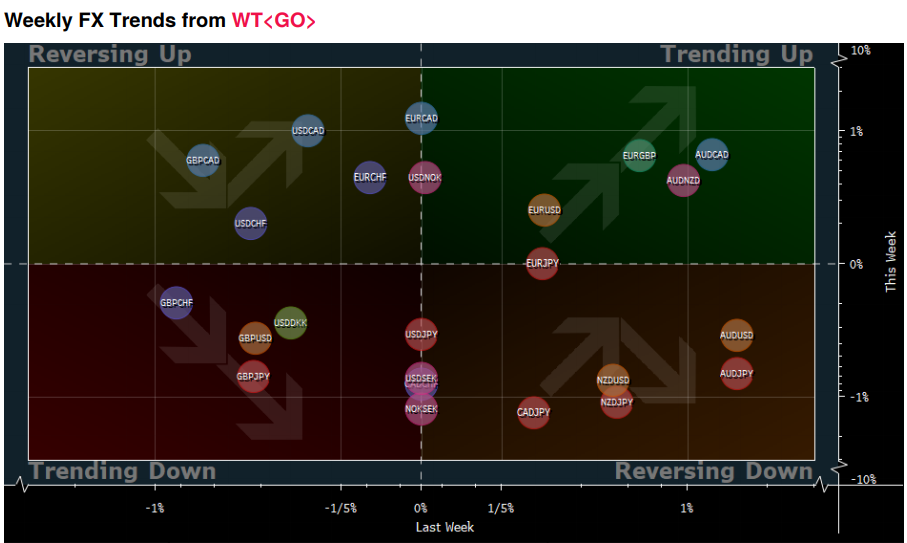


- **USD**: The dollar index remained below 90.5 in the fourth week of December, stronger than an over 2-1/2-year low of 89.80 touched in the previous week but much weaker than the 100 mark reached in the beginning of the coronavirus pandemic. The DXY rose 0.34% WoW. Prospects of a swift economic recovery in 2021 as the Covid-19 vaccine rollout started, a new fiscal stimulus bill, bets the Fed will keep its monetary policy ultra-accommodative and prospects the EU and the UK will finally reach a post-Brexit trade deal have been raising investors risk-appetite, pushing the dollar down. Still, concerns about the new coronavirus strain have prevented further losses.

- **EUR**: EUR/USD climbed onto the 1.2200 level on Thursday fuelled by progress in Brexit talks and broad US dollar weakness. However, for the week the euro lost 0.64% taking its YTD gains to 8.77% versus the dollar. The UK and the EU finally reached a post-Brexit trade deal bringing an end to nine months of tense negotiations.

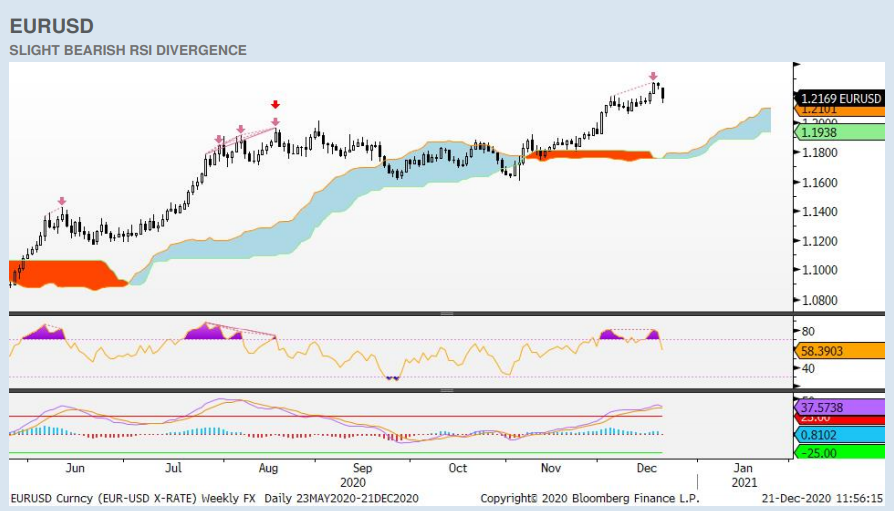

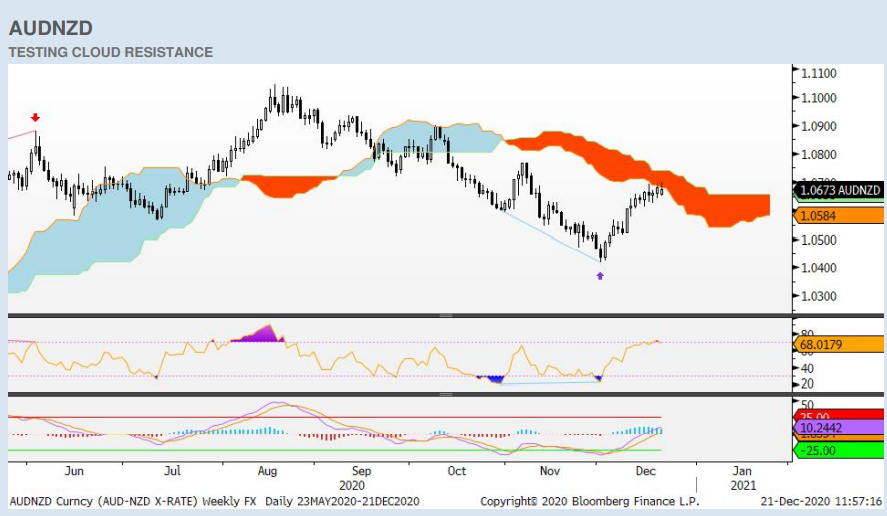

- **JPY**: The yen lost 0.54% this week to end at 103.5 per dollar. ["Make sure the yen-dollar exchange rate does not cross the 100 yen mark,"](https://asia.nikkei.com/Politics/Inside-Japanese-politics/Suga-draws-line-in-the-sand-Defend-100-yen-dollar-barrier) Prime Minister Yoshihide Suga told Finance Ministry officials. His comment, which was confirmed by multiple sources, came with an unspoken message: Be prepared to sell yen for dollars in case the Japanese currency breaches the key threshold. Tokyo-listed exporters need the yen to stay at 100.2 to the dollar or weaker in order to turn a profit, according to a January survey by the Cabinet Office.


- **GBP**: The GBP/USD tested the 1.3600 area on Thursday, extending its upward momentum to levels not seen since May of 2018 on mounting speculation that the UK and the European Union are closing in on a Brexit trade agreement. Boris Johnson is due to announce the deal on Christmas Eve after progress made overnight over the EU's fishing rights in British waters. Furthermore, a broader depreciation of the dollar, which has been stuck at an over 2-1/2-year low, exacerbated this bullish sentiment.


- **CNY**: The Chinese yuan briefly touched 6.256 against the greenback in a holiday-thin trade on Friday, the strongest since December, 17th, after the UK reached a trade deal with the UK. Risk appetite was also boosted by a pledge by the People's Bank of China saying it will step up its regulation of the bond market in line with the law, vowing zero tolerance towards illegal activities. Meanwhile, Reuters reported that China's treasury bond issuance in 2021 will hold steady to this year's if no special-anti-virus bonds are sold. Beijing has issued roughly CNY 7 trillion worth of treasury bonds this year, including CNY 1 trillion of anti-virus bonds dedicated to curb the effects of COVID-19. The People’s Bank of China set the midpoint rate at 6.5333 per dollar today, compared with the previous fix of 6.5361. 


- **TRY:** The Turkish lira strengthened to 7.557 per USD on Thursday, the strongest in a month, after the central bank raised borrowing costs by a larger-than-expected 200bps to 17%. Markets were anticipating a 150bps increase in the benchmark one-week repo. It is the second consecutive hike under the new central bank governor as he pledged to tighten policy to ensure price stability. Inflation surged to 14% in November, its highest since August 2019 and well above the 3%-7% target. Last week, the Trump administration has imposed sanctions on Turkey over its purchase of Russian S-400 defenses, while tensions with NATO ally Greece over a Mediterranean gas dispute continued. The lira has been the worst performer in emerging markets this year, having touched a record low of 8.6 against the greenback last month. 

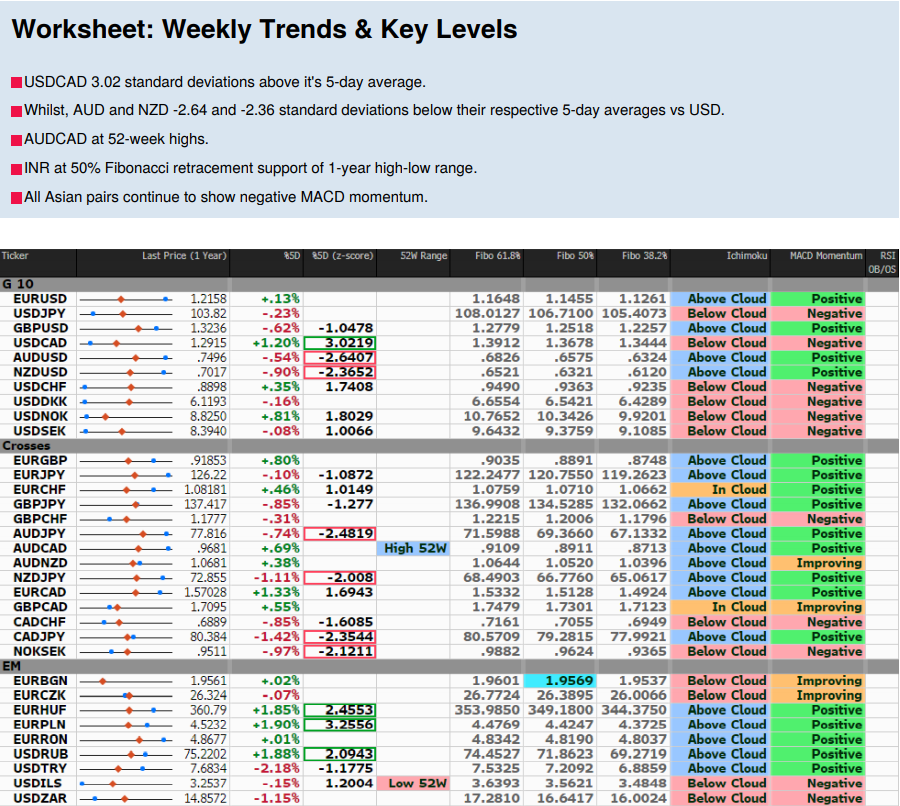

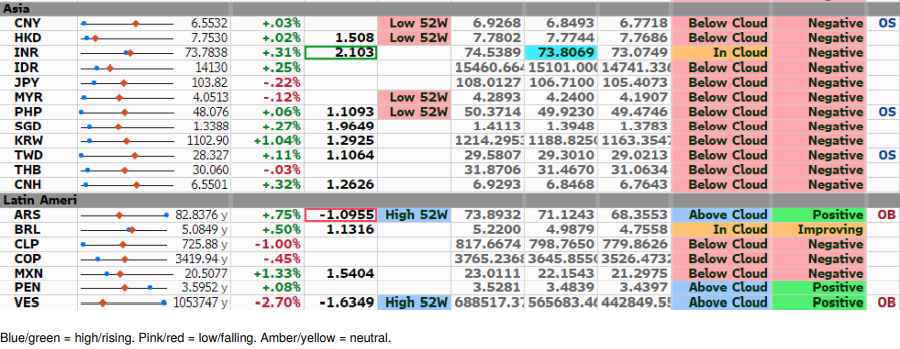

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [9]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [11]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

In [12]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [13]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()
comd.drop('Lumber', axis=0, inplace=True)

In [14]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [15]:
def perf_comd(timeframe):
    weekly_usd = comd.copy()
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd['Chg WTD (%)'].values,text=weekly_usd1.index, color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd['Chg YTD (%)'].values, text=weekly_usd1.index, color_continuous_scale='rdylgn')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{x} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**

- WTI crude futures reversed earlier losses to trade slightly higher above USD 48 a barrel on Thursday, after the UK and the EU announced a historic post-Brexit trade deal, after months of negotiations and uncertainty. Brent Crude contracts ended 1.7% lower on the week. Still, the current surge in coronavirus cases globally and the imposition of lockdown measures to stop it clouded the outlook on fuel demand recovery. At the same time, oil exports from Saudi Arabia, the world’s largest exporter, plunged by nearly a quarter in October from a year earlier. Putting a floor under prices was a drop in US crude inventories and hopes for an imminent Brexit deal. EIA data showed US crude inventories fell to 499.53 million barrels last week, while gasoline stocks dropped to 237.75 million barrels. 



- Copper hovered near its highest since 2013 on Thursday and other industrial metals rose as investors bet on strong demand next year and stock markets rallied as the European Union and Britain agreed a trade deal. However, relative to last week, copper ended lower by almost 2% while lead ended lower by 3.7%. Copper, aluminium, zinc, nickel and tin are up by between 12% and 27% in 2020, with several near multi-year highs. Lead has lagged, up by only around 2.5%. Meanwhile, MMG said transport had been temporarily disrupted near its Las Bambas copper mine in Peru, forcing it to [declare force majeure on some supply contracts](https://in.reuters.com/article/peru-copper-bambas/mmg-declares-force-majeure-on-some-contracts-as-protests-disrupt-copper-mine-idINL4N2J40F0).


- In softs, soybeans were the top gainers, rising 3.82% this week, taking its YTD gains to 35%. [Chinese imports of U.S. soybeans in November more than doubled from the previous year](https://www.agriculture.com/markets/newswire/update-1-chinas-nov-soybean-imports-from-us-surge-on-year-after-trade-deal), customs data showed on Friday, as cargoes booked following a Phase 1 trade deal between the United States and China arrived in the country. The world's top buyer of soybeans brought in 6.04 million tonnes of the oilseed from the United States in November, up 136% from 2.56 million tonnes a year ago, data from the General Administration of Customs showed. In the first 11 months of the year, China imported 20.05 million tonnes of U.S. soybeans, up 45% from 13.85 million tonnes the previous year.


- US Sugar futures also rose more than 3% this week. Data showed China’s sugar imports in November surged 115.2% year-on-year to 710,000 tonnes. Ukrainian sugar refineries have produced 984,300 tonnes of white sugar in the production year which began on Sept. 1, the national sugar union said. Reuters reported, citing sources, that EU states have started to prepare their procedure to put in place a new trade deal with Britain from Jan. 1, indicating a deal could be imminent.


- In precious metals Gold and Silver ended the weak marginally lower by 0.3% and 0.5% respectively. Platinum ended lower by 1% at USD 1032 while Palladium lost 0.8% to settle at USD 2345.50.

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [16]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)